# 📚 Boosting Algorithms

This guide explains two popular boosting algorithms, **AdaBoost** and **Gradient Boosting**, with beginner-friendly math and structure.

---

## 🚀 1. AdaBoost (Adaptive Boosting)

**Goal:** Combine many weak classifiers (e.g., decision stumps) into a single strong classifier.


### 👉 Step 0: Setup

- Training data: $ \{(x_1, y_1), \dots, (x_N, y_N) \} $
- Labels: $ y_i \in \{-1, +1\} $


### ✅ Step 1: Initialize Sample Weights

Every sample gets equal weight at the beginning:

$$
D_1(i) = \frac{1}{N}
$$

### ✅ Step 2: Train First Weak Classifier

Train a weak learner $h_1(x)$ using weights $D_1(i)$.  
Compute weighted error:

$$
\varepsilon_1 = \sum_{i=1}^N D_1(i) \cdot \mathbb{I}(h_1(x_i) \ne y_i)
$$

### ✅ Step 3: Compute Classifier Weight

More accurate classifiers get more say in the final result:

$$
\alpha_1 = \frac{1}{2} \ln \left( \frac{1 - \varepsilon_1}{\varepsilon_1} \right)
$$


### ✅ Step 4: Update Sample Weights

Increase the weights of misclassified samples:

$$
D_2(i) = \frac{D_1(i) \cdot e^{-\alpha_1 y_i h_1(x_i)}}{Z_1}
$$

- $Z_1$ is a normalization factor (so weights sum to 1).


### 🔁 Step 5: Repeat

Repeat Steps 2–4 for $T$ rounds to get $h_t(x)$ and $\alpha_t$.


### 🧮 Step 6: Final Model

Combine all weak learners with weighted majority vote:

$$
H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t \cdot h_t(x) \right)
$$

---

## 🔥 2. Gradient Boosting (Regression Perspective)

**Goal:** Build models sequentially that correct errors made by previous ones.


### 👉 Step 0: Setup

- Training data: $ \{(x_i, y_i)\}_{i=1}^N $
- Predict continuous values: $ \hat{y}_i \approx y_i $


### ✅ Step 1: Initialize with Mean

Use a constant prediction:

$$
F_0(x) = \arg\min_c \sum_{i=1}^N (y_i - c)^2 = \text{mean}(y)
$$


### ✅ Step 2: Compute Residuals

Compute errors (residuals) for each point:

$$
r_i^{(t)} = -\left[\frac{\partial \text{Loss}(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x) = F_{t-1}(x)}
$$

For squared error loss:

$$
r_i^{(t)} = y_i - F_{t-1}(x_i)
$$


### ✅ Step 3: Fit Weak Learner

Train a regression tree $h_t(x)$ to predict $r_i^{(t)}$.


### ✅ Step 4: Update Model

Add a scaled version of the weak learner to the model:

$$
F_t(x) = F_{t-1}(x) + \eta \cdot h_t(x)
$$

- $\eta$ is the learning rate (small value like 0.1).


### 🧮 Final Model:

After $T$ iterations:

$$
F_T(x) = F_0(x) + \eta \cdot \sum_{t=1}^T h_t(x)
$$


---




## 📝 Summary Comparison

| Step        | AdaBoost (Classification)                 | Gradient Boosting (Regression)                |
|-------------|-------------------------------------------|-----------------------------------------------|
| Initialize  | Equal sample weights                      | Predict mean value                            |
| Learn       | Minimize weighted classification error    | Fit residuals                                 |
| Update      | Increase weights of misclassified points  | Add tree to correct prediction error          |
| Combine     | Weighted majority vote                    | Additive model of learners                    |
| Final Form  | $ \text{sign}\left(\sum \alpha_t h_t(x)\right) $ | $ F_0 + \sum \eta h_t(x) $                    |


---
# Python Code 
## AdaBoost (Classification)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Generate a classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. AdaBoost with decision stumps (updated syntax)
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # <-- updated here!
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# 4. Fit and evaluate
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Test Accuracy: 0.9


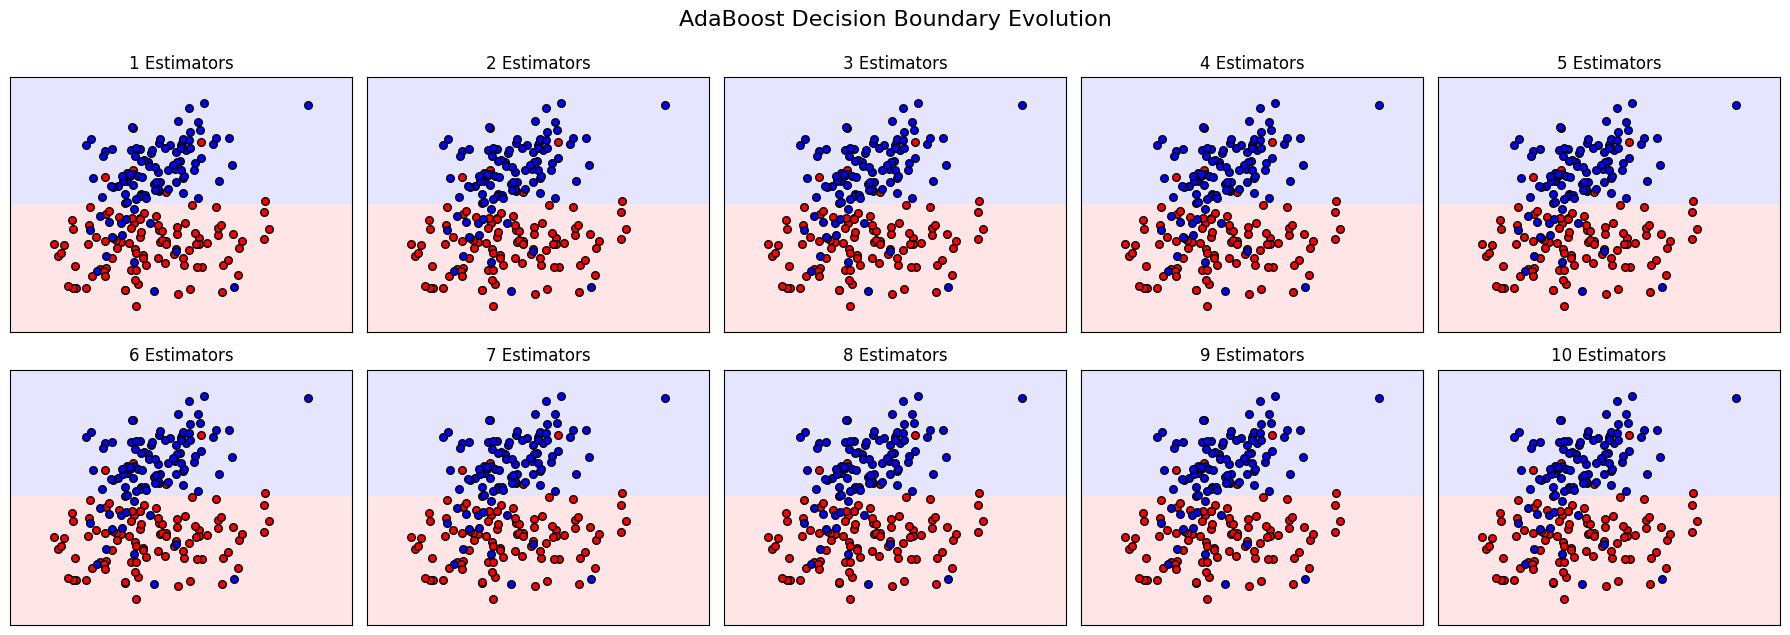

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Create a 2D classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42
)

# Define color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ["red", "blue"]

# Plot decision boundaries as AdaBoost builds up
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Loop through 1 to 10 estimators to show evolution
for i, ax in enumerate(axes):
    # Train AdaBoost with (i+1) estimators
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=i+1,
        learning_rate=1.0,
        random_state=42
    )
    ada.fit(X, y)

    # Predict over grid
    Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision surface
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    for label in np.unique(y):
        ax.scatter(X[y == label, 0], X[y == label, 1],
                   c=cmap_bold[label], edgecolor='k', label=f"Class {label}", s=30)
    ax.set_title(f"{i+1} Estimators")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.suptitle("AdaBoost Decision Boundary Evolution", fontsize=16, y=1.05)
plt.show()


## Gradient Boosting (Regression) 

Gradient Boosting Test MSE: 2553.7693783181985


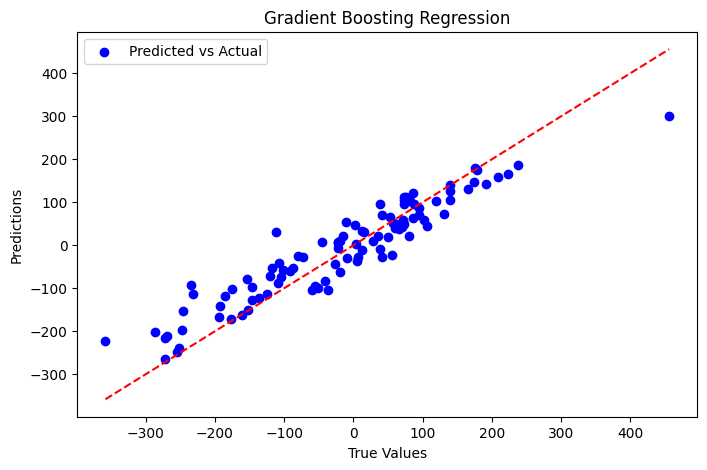

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate a synthetic regression dataset
X, y = make_regression(
    n_samples=500, n_features=10, noise=10, random_state=42
)

# 2. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create Gradient Boosting model
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 4. Train the model
gbr.fit(X_train, y_train)

# 5. Predict on test set
y_pred = gbr.predict(X_test)

# 6. Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Test MSE:", mse)

# Optional: visualize predictions vs true values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()
